In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\mzaki\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r'F:\100DaysDatasets\packwithcgpa.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

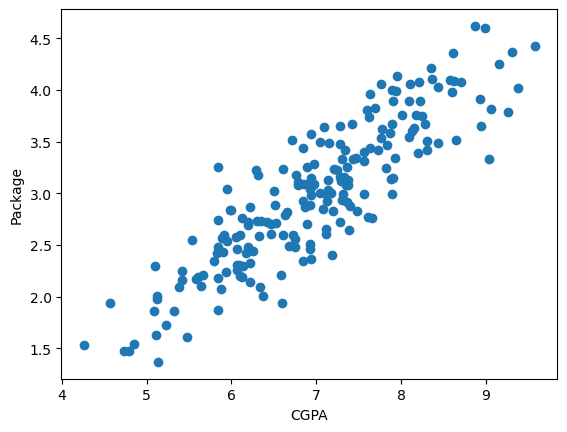

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [4]:
x=df.iloc[:,0:1]

In [5]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
y=df.iloc[:,-1]

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

C:\Users\mzaki\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package(in LPA)')

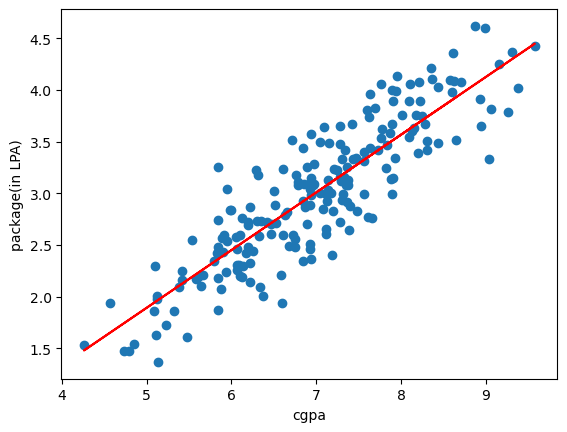

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package(in LPA)')

In [14]:
m=lr.coef_
b=lr.intercept_

In [15]:
# Y=MX+C

m*8.58+b

array([3.89111601])

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
y_pred=lr.predict(x_test)

In [18]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [19]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [20]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [21]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [22]:
print("MSE",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

MSE 0.780730147510384


In [23]:
x_test.shape

(40, 1)

In [25]:
#Adjusted R2 Score

1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [26]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.966154,3.26
1,5.12,0.450350,1.98
2,7.82,0.820565,3.25
3,7.42,0.336495,3.67
4,6.94,0.820749,3.57


Text(0, 0.5, 'Package(in lpa)')

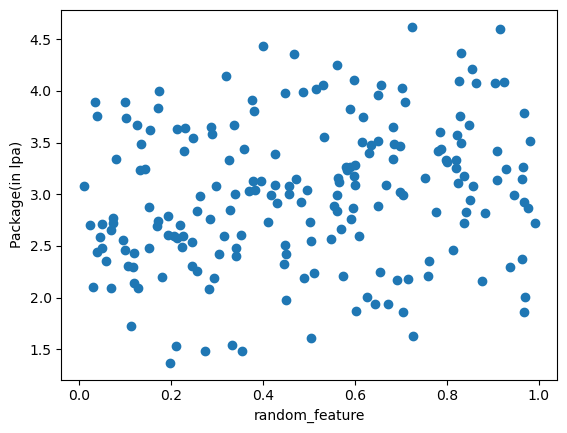

In [27]:

plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [28]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [31]:
lr = LinearRegression()


In [32]:
lr.fit(X_train,y_train)


LinearRegression()

In [33]:
y_pred = lr.predict(X_test)


In [34]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


R2 score 0.7477076799557474


In [35]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7340702572506527

In [36]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]


In [37]:
new_df2.sample(5)


,cgpa,iq,package
10,5.32,1.46,1.86
56,5.84,2.44,2.74
6,6.73,1.50,2.60
177,7.09,4.34,3.64
66,5.11,1.23,1.63


Text(0, 0.5, 'Package(in lpa)')

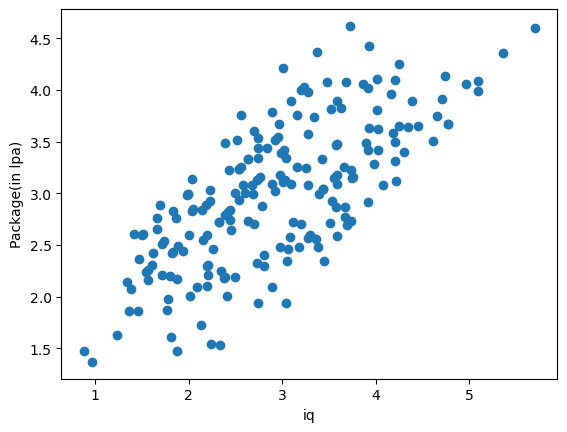

In [38]:

plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [39]:

np.random.randint(-100,100)

74

In [40]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [43]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8187719277449804


In [44]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8089758157311956